Madeni para adeti : 25


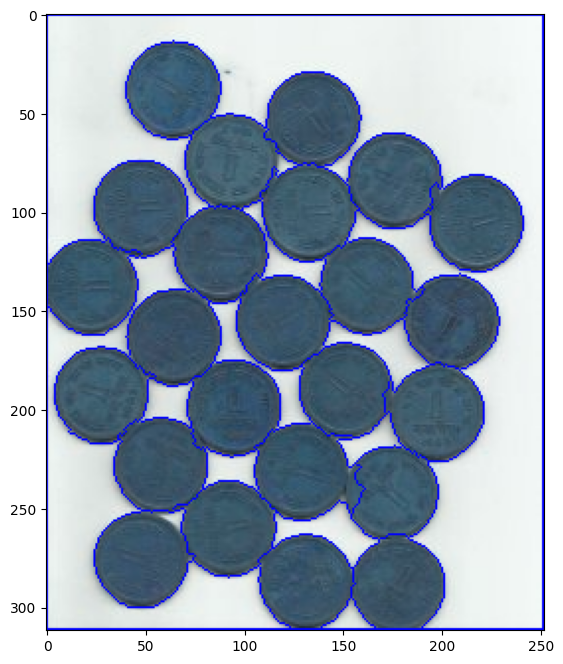

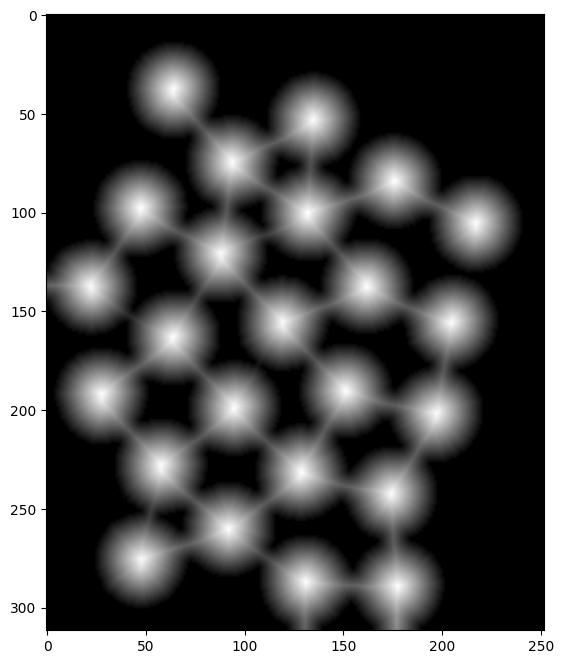

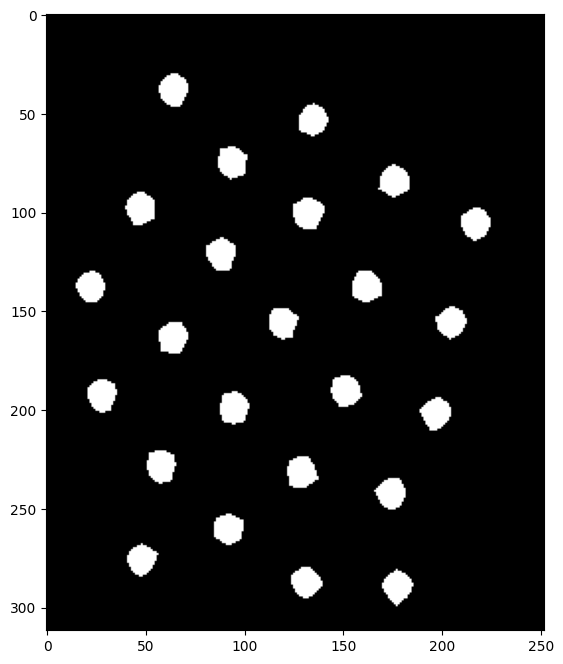

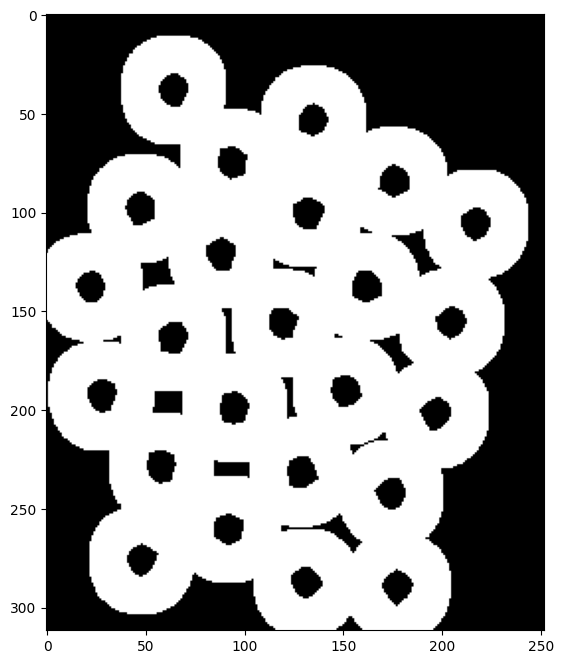

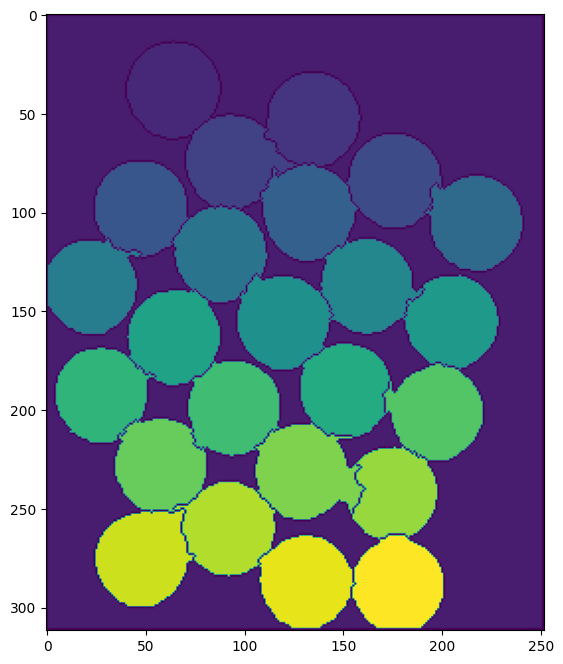

In [6]:
# gerekli paketleri(kütüphaneleri) içe aktarıyoruz
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap=None):  #matplotlib kütüphanesini kullanarak bir takım işlemlerden geçmiş veya geçmemiş resimlerimizi göstermek için display adlı bir fonksiyon oluştururuz
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

image = cv2.imread("D:/Coin_Counting/src/para.jpg")  #giriş görüntümüzü diskten alıyoruzz
filtered = cv2.pyrMeanShiftFiltering(image, 13, 51)  #giriş görüntümüze blurlama filtresi uygulayıp gürültüleri ortadan kaldırıyoruz

gray = cv2.cvtColor(filtered,cv2.COLOR_BGR2GRAY)  #filtrelenmiş görüntümüzü gri tonuna çeviriyoruz
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  #gri resmimize threshold uyguluyoruz 

kernel = np.ones((3,3),np.uint8)  # 3'e 3'lük 0'lardan oluşan bir kernel oluşturuyoruz
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)  #threshold uygulanmış resmin gürültülerini azaltıyoruz ve daha net bir görüntü elde ediyoruz.
sure_bg = cv2.dilate(opening,kernel,iterations=3)  #yeterli yineleme sayısı(iterations) vererek openingten gelen piksel değerlerinideki beyaz değerlerinin ağırlığını artırıyoruz

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) #görüntüdeki nesnelerin kenarlarını belirlemek veya nesneler arasındaki uzaklıkları hesaplamak için bu işlemi yaptık
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0) #dist_transformden gelen değerin %70inin altındaki değerleri 0 üstündeki değerleri ise 255 değerine eşitliyoruz 

sure_fg = np.uint8(sure_fg) #sure_fg değişkenin veri tipini integer yapıyoruz
unknown = cv2.subtract(sure_bg,sure_fg)  #sure_bg görüntüsünden sure_fg görüntüsünü çıkardık.(iki görüntü arasındaki piksel değerlerini çıkartmayı sağlar)

ret, markers = cv2.connectedComponents(sure_fg) #sure_fg görüntüsündeki bağlı değişkenleri bulmamızı sağlar (yani her bir parayı)
markers = markers+1 #markers görüntüsündeki tüm piksellere 1 eklenir 
markers[unknown==255] = 0 #unknown görüntüsündeki piksel değerleri 255 olan değerleri markers görüntüsünde 0'a eşitleriz.

markers = cv2.watershed(image,markers) #nesneleri ve arka planı ayrıştırırız
image[markers == -1] = [0, 0, 255]   #markers görüntüsündeki işaretsiz yani işlenmeyen pikselleri kırmızı değerine eşitleriz
num_coins = len(np.unique(markers)) - 1


print("Madeni para adeti :",num_coins) #para adetini yazdırırırz

display(image,cmap='gray') #resmimizi gösteririz
display(dist_transform,cmap='gray')
display(sure_fg,cmap='gray')
display(unknown,cmap='gray')
display(markers)